In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
digits = load_digits()

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [5]:
images.shape

(1797, 8, 8)

In [6]:
img = images[13] #3 = i%10

In [7]:
def show1(img):
    assert 2 == len(img.shape)
    plt.figure()
    plt.gray()
    plt.imshow (img , interpolation = "nearest") # also try interpolation =" bicubic "
    plt.show ()


In [8]:
def show2(imag):  
    assert 2 == len(img.shape)
    plt.figure()
    plt.gray()
    plt.imshow (img , interpolation = "bicubic") # also try interpolation =" bicubic "
    plt.show ()
    

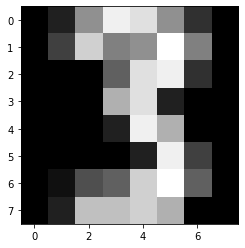

In [9]:
show1(img)

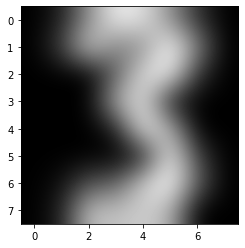

In [10]:
show2(img)

In [11]:
from sklearn import model_selection
X_all = data
#y_all = target
X_train , X_test , y_train , y_test =model_selection . train_test_split ( digits.data , digits.target , test_size = 0.4 , random_state = 0)

### 3.2

In [12]:
def dist_loop2(training, test):
    distance_matrix = np.zeros((len(training), len(test)))
    for i in range(len(training)):
        train_data = training[i]
        for k in range(len(test)):
            test_data = test[k]
            diff = np.abs(train_data - test_data)
            diff_square = np.square(diff)
            distance  = np.sqrt(np.sum(diff_square))
            distance_matrix[i][k] = distance
    return distance_matrix        

In [13]:
x = dist_loop2(X_train, X_test)
x

array([[55.67764363, 53.12249994, 56.56854249, ..., 54.91812087,
        50.76416059, 46.87216658],
       [47.51841748, 45.65084884, 48.72371086, ..., 45.475268  ,
        52.10566188, 40.18706259],
       [45.54119015, 53.72150407, 45.07771068, ..., 44.96665431,
        50.8625599 , 41.53311931],
       ...,
       [46.        , 45.54119015, 46.28174586, ..., 51.32250968,
        44.62062303, 48.61069841],
       [44.98888752, 49.07137659, 53.55371136, ..., 57.91372894,
        27.80287755, 40.28647416],
       [44.77722635, 41.07310556, 40.31128874, ..., 43.78355856,
        52.        , 44.22668877]])

In [14]:
def dist_loop(training, test):
    distance_matrix = np.zeros((len(training), len(test)))
    for i in range(len(training)):
        train_data = training[i]
        for k in range(len(test)):
            test_data = test[k]
            diff = np.abs(train_data - test_data)
            distance  = LA.norm(diff)  #A little bit quicker
            distance_matrix[i][k] = distance
    return distance_matrix 
            

In [15]:
%timeit dist_loop(X_train, X_test)


5.39 s ± 217 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 3.3 

In [17]:
def dist_vec(training, test):
    distance_matrix = np.zeros((len(training), len(test)))
    x = np.full_like
    distance_matrix= LA.norm(np.abs(xx-yy))
    return distance_matrix 

In [18]:
def dist_vec(training, test):
    distance_matrix = np.zeros((len(training), len(test)))
    x= np.full(len(training), True, dtype = bool)
    y= np.full(len(test), True, dtype = bool)
    distance_matrix[x,y] = np.sqrt(np.sum(np.square(np.abs(X_train[x,:]-X_test[y,:]))))
    return distance_matrix 

In [32]:
def dist_vec(training, test):
    distance_matrix = np.zeros((len(training), len(test)))
    for i in range(len(training)):
        train_data = training[i]
        x= np.abs(train_data-test) #Esta bien pero forma diferente
        y = np.square(x[:]) #Probablemente tambien bien
        z= np.sum(y,axis=1) #correcto
        distance_matrix[i][:]  = np.sqrt(z)
    return distance_matrix 
y = dist_vec(X_train, X_test)


In [20]:
%timeit dist_vec(X_train, X_test)

145 ms ± 6.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
def dist_vec2(training, test):
    distance_matrix = np.zeros((len(training), len(test)))
    x= np.abs(training-test) #Esta bien pero forma diferente
    y = np.square(x[:]) #Probablemente tambien bien
    z= np.sum(y,axis=1) #correcto
    distance_matrix[:][:]  = np.sqrt(z)
    return distance_matrix 

### 3.4

In [23]:
X_train2= []
X_test2= []
y_train2= []
y_test2= []
for i in range(len(X_train)):
    if y_train[i] ==3 or y_train[i] == 9:
        X_train2.append(X_train[i])
        y_train2.append(y_train[i])
for i in range(len(X_test)):
    if y_test[i] ==3 or y_test[i] == 9:
        X_test2.append(X_test[i])
        y_test2.append(y_test[i])

In [24]:
# Nearest neighbour classifier for arbitrary training set size
#D =64
def nn_classifier(training,test,number_of_test,number_of_neighbors, y):
    diff = dist_loop(training[:number_of_neighbors],test)
    idx = np.argmin(diff[:,number_of_test])


    label = y[idx]
    return label

In [25]:
errors = []
k_array = np.array([1,3,5,9,17,33])
for k in k_array:
    n_errors = 0
    for i in range(len(X_test2)):
        if nn_classifier(X_train2, X_test2, i,k, y_train2) != y_test2[i]: n_errors += 1
    errors.append(n_errors/len(X_test2))


In [26]:
errors

[0.5138888888888888,
 0.2222222222222222,
 0.16666666666666666,
 0.13194444444444445,
 0.09722222222222222,
 0.041666666666666664]

<ErrorbarContainer object of 3 artists>

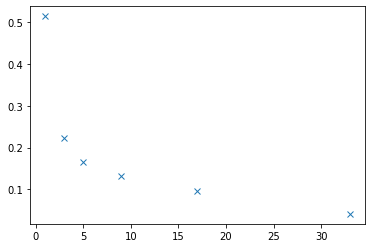

In [27]:
plt.errorbar(k_array, errors, fmt='x')

In [28]:
errors = []
k_array = np.arange(1,30,2)
for k in k_array:
    n_errors = 0
    for i in range(len(X_test2)):
        if nn_classifier(X_train2, X_test2, i,k, y_train2) != y_test2[i]: n_errors += 1
    errors.append(n_errors/len(X_test2))

<ErrorbarContainer object of 3 artists>

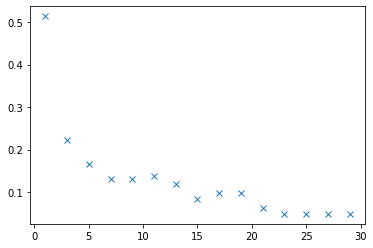

In [29]:
plt.errorbar(k_array, errors, fmt='x')

<ErrorbarContainer object of 3 artists>

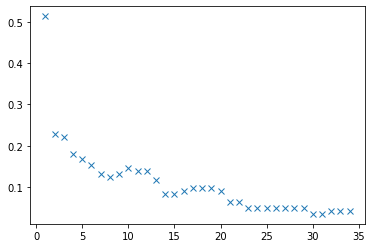

In [34]:
def nn_classifier(training,test,number_of_test,number_of_neighbors, y):
    diff = dist_vec(training[:number_of_neighbors],test)
    idx = np.argmin(diff[:,number_of_test])


    label = y[idx]
    return label
errors = []
k_array = np.arange(1,35,1)
for k in k_array:
    n_errors = 0
    for i in range(len(X_test2)):
        if nn_classifier(X_train2, X_test2, i,k, y_train2) != y_test2[i]: n_errors += 1
    errors.append(n_errors/len(X_test2))
plt.errorbar(k_array, errors, fmt='x')